# Исследование закономерностей на рынке аренды электросамокатов

# Описание проекта:

## Исходные данные:
- **Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:**

- **без подписки**
    - `абонентская плата отсутствует`;
    - `стоимость одной минуты поездки — 8 рублей`;
    - `стоимость старта (начала поездки) — 50 рублей`;
    
- **с подпиской Ultra**  
    - `абонентская плата — 199 рублей в месяц`;
    - `стоимость одной минуты поездки — 6 рублей`;
    - `стоимость старта — бесплатно`;

**В основных данных есть информация о пользователях, их поездках и подписках.**

**СТРУКТУРА ТАБЛИЦ С ИСХОДНЫМИ ДАННЫМИ(СТОЛБЦЫ)**

### пользователи
- `user_id`	- уникальный идентификатор пользователя;  
- `name` - 	имя пользователя;  
- `age`	- возраст;
- `city` -	город;
- `subscription_type` -	тип подписки (free, ultra);

### поездки
- `user_id` - 	уникальный идентификатор пользователя
- `distance` -	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` -	дата совершения поездки

### Подписки
- `subscription_type` - тип подписки
- `minute_price` -	стоимость одной минуты поездки по данной подписке
- `start_ride_price` -	стоимость начала поездки
- `subscription_fee` -	стоимость ежемесячного платежа


## Цель проекта:
- `проверка гипотез с целью увеличения прибыльности компании`
- `разработка методических рекомендаций`

## Ход исследования

**Исходные данные о недвижимости я получу из файлов /datasets/users_go.csv,
/datasets/rides_go.csv, /datasets/subscriptions_go.csv**
**О качестве исходных данных ничего не известно. Поэтому перед проведением исследования понадобится обзор данных и их предобработка**

**Я проверю исходные датасеты на наличие ошибок, пропусков, дубликатов и артефактов, а также оценю их влияние на исследование. За тем в предобработке поищу способы исправить ошибки в данных, которые могут привести к искажению результата. Далее создам необходимые столбцы и приступлю к выполнению исследования.**

**Короткий план исследования:**
- **Обзор данных**
- **Предобработка**
- **добавление недостающих столбцов**
- **Исследование требуемых по  техническому заданию зависимостей**
- **Общий вывод**
- **Итоговые рекомендации**

# Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
try:
    users =  pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv', sep=',')
    rides =  pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', sep=',')
    subs =   pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv', sep=',')

except:
    print('Не удается загрузить исходные данные')
display(users.head())
display(rides.head())
subs.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Изучили полную информацию по исходным данным**

In [3]:
users.info()

rides.info()

subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

## Вывод
**В таблице `users` присутствует 1565 пользователей. Такого размера выборки хватит для объективного исследования. В таблице
`rides` присустствует 18068 поездок(в среднем примерно по 12 поездок на человека). Основная количественная информация в исходных данных представлена типом данных *float*. Это не нужно менять, такие данные, как РАССТОЯНИЕ имеют непрерывный спектр значений.
При этом ВОЗРАСТ представлен типом данных *int*, т.к имеет смысл рассматривать дискретный спектр возрастов. В целом все типы данных, кроме даты поездки соответствуют значения в столбцах**

## Изменение типов данных

**Начальная оценка исходных данных показала, что столбец `date` в таблице `users` имеет тип данных int. Изменили тип данных этого столбца на datetime**

In [4]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


## Удаление пропусков и дубликатов

### Пропуски

**Проверили исходные таблицы на наличие дубликатов**

In [5]:
display(pd.DataFrame(round(users.isna().mean()*100,)).style.background_gradient('coolwarm'))
display(pd.DataFrame(round(rides.isna().mean()*100,)).style.background_gradient('coolwarm'))

,0
user_id,0.000000
name,0.000000
age,0.000000
city,0.000000
subscription_type,0.000000


,0
user_id,0.000000
distance,0.000000
duration,0.000000
date,0.000000


**Проверка показала, что пропуски в даннх отсутствуют**

### Дубликаты

#### Явные дубликаты

In [6]:
print(users.value_counts())
print(rides.value_counts())

user_id  name       age  city            subscription_type
209      Андрей     23   Омск            ultra                2
807      Александр  28   Екатеринбург    free                 2
611      Владимир   28   Омск            ultra                2
43       Стефания   22   Омск            ultra                2
737      Мелания    27   Ростов-на-Дону  free                 2
                                                             ..
520      Анжелика   30   Екатеринбург    ultra                1
519      Даниэль    22   Ростов-на-Дону  ultra                1
518      Алиса      22   Ростов-на-Дону  ultra                1
517      Олег       25   Краснодар       ultra                1
1534     Альберт    25   Краснодар       free                 1
Length: 1534, dtype: int64
user_id  distance     duration   date      
1        748.690645   15.041884  2021-11-22    1
1105     3232.037291  19.120140  2021-02-24    1
         4661.122393  21.159450  2021-03-25    1
         4468.50961

In [7]:
users = users.drop_duplicates().reset_index(drop=True)
print(users.duplicated().sum())
rides = rides.drop_duplicates().reset_index(drop=True)
print(rides.duplicated().sum())

0
0


#### Неявные дубликаты

**Проверили категориальные переменные на наличие неявных дубликатов**

In [8]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [9]:
users['city'] = users['city'].str.lower()
users['city'].unique()

array(['тюмень', 'омск', 'москва', 'ростов-на-дону', 'краснодар',
       'пятигорск', 'екатеринбург', 'сочи'], dtype=object)

## Добавление необходимых столбцов

**Добавили столбец с месяцем поездки**

In [10]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Проверили, за какой период имеются данные**

In [11]:
rides['date'].dt.year.unique()

array([2021])

**Видно, что исходные данные содержат в себе информацию только за 2021 год, поэтому никаких дополнительных действий с добавленным столбцом делать не требуется**

## Вывод

- **Была проведена предобработка исходных данных:**
- **Вывели ключевую информацию по датасетам.**
- **Проверили исходные данные на наличие пропусков. Они отсутствуют.**
- **Далее удалили явные дубликаты(повторяюциеся строки) и убедились, что они удалились корректно. Избавились от неявных дубликатов в категориальных переменных.** 
- **Исходные данные пригодны для дальнейшего исследования.**

# Исследовательский анализ данных

## Частота встречаемости городов

**Изучили столбец с городами из исходной таблицы**

In [12]:
#users.groupby('city')['user_id'].count()
cities = users['city'].value_counts()
cities

пятигорск         219
екатеринбург      204
ростов-на-дону    198
краснодар         193
сочи              189
омск              183
тюмень            180
москва            168
Name: city, dtype: int64

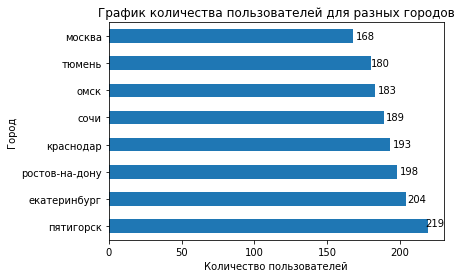

In [13]:
cities.plot.barh()
plt.title("График количества пользователей для разных городов")
plt.xlabel("Количество пользователей")
plt.ylabel("Город")
plt.text(170, 6.9, "168")
plt.text(180, 5.9, "180")
plt.text(185, 4.9, "183")
plt.text(190, 3.9, "189")
plt.text(195, 2.9, "193")
plt.text(200, 1.9, "198")
plt.text(205, 0.9, "204")
plt.text(217, 0, "219")
plt.show()

**Из сгруппированных данных видно, что в каждом из представленных городов присутствует достаточное для исследования количество пользователей**

## Соотношение пользователей с подпиской и без

**Проверили, какая доля пользователей не имеет активной подписки**

In [14]:
users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

**Для большего удобства оценки построили диограмму**

Text(0.5, 1.0, 'График количества пользователей с подпиской и без')

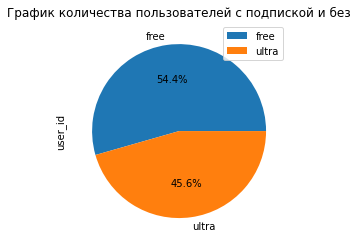

In [15]:
labels = ['free', 'ultra']
users.groupby(['subscription_type']). count ().plot(kind='pie', y='user_id', labels=labels, autopct='%1.1f%%')
plt.title("График количества пользователей с подпиской и без")

**Количества пользователей с подпиской и без в исходных данных примерно одинаково. В обех группах данных достаточно для 
исследования**

## Возраст пользователей

**Изучили данные столбца с возрастом пользователей.**

Text(0, 0.5, 'количество пользователей')

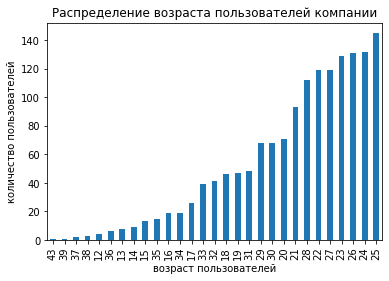

In [16]:
ax = users['age'].value_counts(ascending=True).plot.bar()
plt.title('Распределение возраста пользователей компании')
plt.xlabel("возраст пользователей")
plt.ylabel('количество пользователей')

**Также вычислили ключевые параметры распределения**

In [17]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Гистограмма напоминает нормальное распределение. Чаще всего самокатами пользуются люди от20 до 27 лет. Возможно, этими возрастными группаии пользователей самокаты используются для доставки**

## Расстояние, пройденное пользователем за одну поездку

**Исследовали расстояние пройденное разными пользователями за одну поездку**

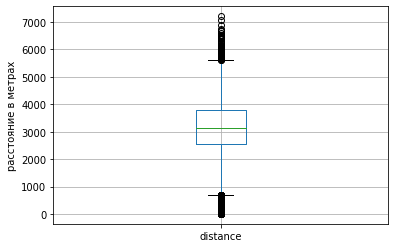

In [18]:
rides.boxplot(column= 'distance')
plt.ylabel('расстояние в метрах')
plt.show()

**По диограмме размаха видно, что всреднем за каждую поездку пользователь проезжал около 3 км. Однако есть и поездки длиной 7 км. Эти 
поездки не выглядят выбросами**

## Продолжительность поездок

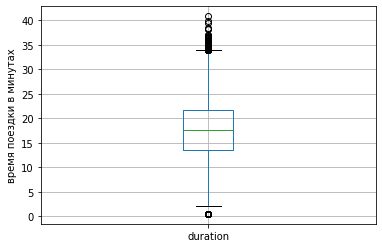

In [19]:
rides.boxplot(column= 'duration')
plt.ylabel('время поездки в минутах')
plt.show()

**Из диаграммы размаха видно, что поездки в среднем длятся около 15 - 20 минут. Есть довольно много 
40-минутных поездок(Не похоже на выбросы). Однако есть несколько поездок длительностью < 1 минуты.
Скорее всего, это не выбросы, например человек предумал брать самокат и решил пойти пешком. Данные выглядят
пригодными для дальнейшего исследования.**

# Объединие данных

**Объединили данные о пользователях, поездках и подписках в один датафрейм.**

In [20]:
users_all = users.merge(rides, on='user_id', how='left')
users_all = users_all.merge(subs, on='subscription_type', how='left')
users_all.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [21]:
print(users_all.duplicated().sum())
display(users.info)

0


<bound method DataFrame.info of       user_id        name  age            city subscription_type
0           1        Кира   22          тюмень             ultra
1           2   Станислав   31            омск             ultra
2           3     Алексей   20          москва             ultra
3           4  Константин   26  ростов-на-дону             ultra
4           5       Адель   28            омск             ultra
...       ...         ...  ...             ...               ...
1529     1530   Ростислав   29            сочи              free
1530     1531      Никита   25       пятигорск              free
1531     1532     Алексей   26          тюмень              free
1532     1533      Степан   22       краснодар              free
1533     1534     Альберт   25       краснодар              free

[1534 rows x 5 columns]>

## Промежуточный вывод
**Объединение таблиц прошло успешно. Не появилось пропусков. Данные не удалились**

**Создали две дополнительные таблицы для пользователей без подписки и с подпиской**

In [22]:
users_free = users_all.query('subscription_type=="free"')
users_ultra = users_all.query('subscription_type=="ultra"')
display(users_ultra.head())
users_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


**Визуализировали эти таблицы**

## Расстояние поездок

### Визуализация

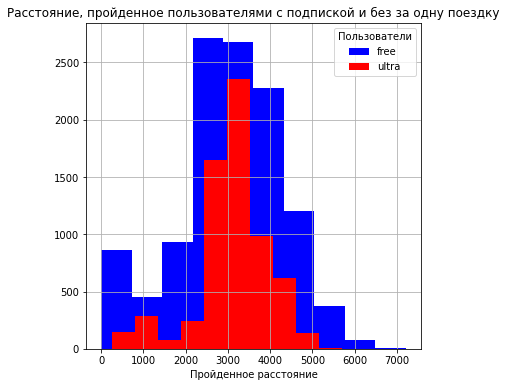

In [23]:
users_free['distance'].hist(color='blue', figsize=(6, 6))
plt.xlabel('Пройденное расстояние')

users_ultra['distance'].hist(color='red', figsize=(6, 6))
plt.title('Расстояние, пройденное пользователями с подпиской и без за одну поездку')
plt.legend(['free', 'ultra'], loc='upper right', title='Пользователи')

plt.show()

### Вывод:
**Из гистограммы видно, что пользователи без подписки проезжают чуть большее расстояние, однако в среднем 
обе группы проезжают около 3 км. С учетом того, что пользователей без подписки немного больше, чем
с подпиской, распределения можно считать одинаковыми**

## Длительность поездок

### Визуализация

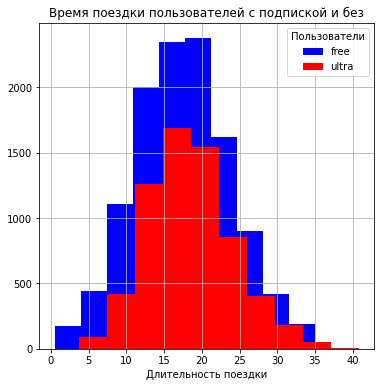

In [24]:
users_free['duration'].hist(color='blue', figsize=(6, 6))
plt.xlabel('Длительность поездки')

users_ultra['duration'].hist(color='red', figsize=(6, 6))
plt.title('Время поездки пользователей с подпиской и без')
plt.legend(['free', 'ultra'], loc='upper right', title='Пользователи')

plt.show()

**Вывели дополнительные статистические данные распределения**

In [25]:
display(users_free['duration'].describe())
users_ultra['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

### Вывод

**По графику  и выведенным статистическим данным видно, что пользователей без подписки в исходных данных немного больше, чем 
пользователей с активной подпиской. В целом с учетом этого распределения для двух этих 
групп совпадают**

# Подсчет выручки

## Для более объективного анализа данных построили сводную таблицу с аггрегированными данными о длительности поездки, пройденном расстоянии и количестве поездок

**Для пользователей без подписки**

In [26]:
import numpy as np

users_all['duration'] = np.ceil(users_all['duration'])
users_all['distance'] = np.ceil(users_all['distance'])

In [27]:
# Агрегация данных
agg_data = users_all.groupby(['user_id', 'month']).agg({
    'distance': 'sum',
    'duration': 'sum',
    'subscription_type': 'first',# Возьмем тип подписки первой по месяцу для пользователя
    'user_id': 'count'
}).rename(columns={'user_id': 'rides_count'}).reset_index()

agg_data.head()

,user_id,month,distance,duration,subscription_type,rides_count
0,1,1,7028.0,42.0,ultra,2
1,1,4,755.0,7.0,ultra,1
2,1,8,6724.0,46.0,ultra,2
3,1,10,5811.0,32.0,ultra,2
4,1,11,7005.0,56.0,ultra,3


**Для пользователей с подпиской**

## Добавили столбец с суммарной выручкой за месяц для каждого пользователя

In [28]:
agg_data['profit'] = 0
# Расчет стоимости поездок
agg_data['profit'] = np.where((agg_data['subscription_type'] == 'ultra'),
                            np.ceil(agg_data['duration']) * subs.loc[1, 'minute_price']  
                              + subs.loc[1, 'subscription_fee'],
                             agg_data['profit'])

agg_data['profit'] = np.where((agg_data['subscription_type'] == 'free'),
                            np.ceil(agg_data['duration']) * subs.loc[0, 'minute_price'] 
                              + subs.loc[0, 'start_ride_price'] * agg_data['rides_count'],
                             agg_data['profit'])
# Вывод агрегированных данных с выручкой
display(agg_data.head(5))
agg_data.tail(5)

,user_id,month,distance,duration,subscription_type,rides_count,profit
0,1,1,7028.0,42.0,ultra,2,451.0
1,1,4,755.0,7.0,ultra,1,241.0
2,1,8,6724.0,46.0,ultra,2,475.0
3,1,10,5811.0,32.0,ultra,2,391.0
4,1,11,7005.0,56.0,ultra,3,535.0


,user_id,month,distance,duration,subscription_type,rides_count,profit
11326,1534,6,3411.0,26.0,free,2,308.0
11327,1534,8,7623.0,48.0,free,2,484.0
11328,1534,9,4929.0,23.0,free,1,234.0
11329,1534,11,13353.0,78.0,free,4,824.0
11330,1534,12,2372.0,16.0,free,1,178.0


# Проверка гипотез:

## Тратят ли позователи с подпиской больше премени на поездки

### H0(нуливая гипотеза): Среднее время поездки для пользователей с подпиской и без одинаково

### H1(альтернативная гипотеза): Среднее время поездки для пользователей с подпиской >, чем для 2 группы

**Проверим гипотезу методом описательной статистки**

**Т.к мы не можем уверенно утверждать о равенстве дисперсий двух вышеозначенных выборок, то для сохранения консервативности в отношении предположений, выставим `equal_var=False`**

In [29]:
from scipy import stats as st
import numpy as np
alpha = 0.05 # такого уровня статистической значимости бутет достаточно
                           
results = st.ttest_ind(users_ultra['duration'], users_free['duration'], equal_var = False, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Гипотезу "Среднее время поездки для пользователей с подпиской >, чем для 2 группы" не следует отвергать')
else:
    print('Гипотезу "Среднее время поездки для пользователей с подпиской >, чем для 2 группы" следует отвергнуть') 

p-значение: 5.6757813771289775e-37
Гипотезу "Среднее время поездки для пользователей с подпиской >, чем для 2 группы" не следует отвергать


### Вывод

**Гипотезу (Среднее время поездки для пользователей с подпиской >, чем для 2 группы) не следует отвергать, есть основания утверждать, что среднее время поездки пользователей с активной подпиской не больше, чем у пользователей без нее**

## Среднее расстояние одной поездки

### H0: Среднее расстояние, которое проезжает пользователь с подпиской за одну поездку не больше 3130

### H1: Среднее расстояние, которое проезжает пользователь с подпиской за одну поездку > 3130

In [30]:
results = st.ttest_1samp(users_ultra['distance'], popmean=3130, alternative='greater')# Сравнение среднего по выборке со значением 3130

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Гипотезу "пользователи с подпиской в среднем проезжают не больше 3130 метров" следует отвергнуть')
else:
    print('Гипотезу "пользователи с подпиской в среднем проезжают не больше 3130 метров" не следует отвергать') 

p-значение: 0.9195368847849785
Гипотезу "пользователи с подпиской в среднем проезжают не больше 3130 метров" не следует отвергать


### Вывод:
**Нет оснований отвергать гипотезу:"Среднее расстояние, которое проезжает пользователь с подпиской за одну поездку не больше 3130". Вероятно у электросамокатов не будет проблем с износом**

## Помесячная прибыль от  пользователей с подпиской больше, чем без

### H0: Помесячная пописка пользователей с подпиской и без одинаковы

### H1: Помесячная подписка пользователей с подпиской больше, чем у пользователей без подписки

**Создали таблицы для помесячной выручки для двух типов пользователей**

In [31]:
free_month_profit = agg_data.query('subscription_type=="free"')['profit']
free_month_profit.head(10)

4533    170.0
4534    962.0
4535    202.0
4536    178.0
4537    332.0
4538    268.0
4539    186.0
4540    452.0
4541    406.0
4542    194.0
Name: profit, dtype: float64

In [32]:
ultra_month_profit = agg_data.query('subscription_type=="ultra"')['profit']
ultra_month_profit.head(10)   

0    451.0
1    241.0
2    475.0
3    391.0
4    535.0
5    367.0
6    577.0
7    439.0
8    283.0
9    487.0
Name: profit, dtype: float64

**Т.к нет достоверных доказательств того, что дисперсии выборок одинаковы, то выставим параметр `equal_var = False`**

In [33]:
alpha = 0.05 # стакого уровня статистической значимости бутет достаточно
# если p-value окажется меньше него, отвергнем гипотезу
results = st.ttest_ind(ultra_month_profit, free_month_profit, equal_var = False, alternative='greater')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Гипотезу "пользователи с подпиской  в среднем приносят больше ежемесячной прибыли" не следует отвергать')
else:
    print('Гипотезу "пользователи с подпиской  в среднем приносят больше ежемесячной прибыли" следует отвергнуть') 

p-значение: 8.874140893976874e-40
Гипотезу "пользователи с подпиской  в среднем приносят больше ежемесячной прибыли" не следует отвергать


**Гипотезу "пользователи с подпиской  в среднем приносят больше ежемесячной прибыли" не следует отвергать. Подписка прибыльнее, если пользователь почти не ездит в течение месяца. Вероятно пользователи берут подписку, если собираются ездить много(так можно сэкономить)**

### Техническая поддержка

**Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. 
Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. 
Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после 
него.**

**Следует проверить, одинаковы ли выборочные средние выборочного распределения количества обращений
для пользователей двух категорий**

**Это можно сделать так: `st.ttest_rel(data_after, data_before)`
Односторонняя гипотеза**

### Акция с промокодами на подписку

**Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выяснили, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 
5 %**

**Подобрали необходимое количество промокодов**

In [34]:
from math import sqrt
p = 1/10
for n in range(1000, 3000):# задали параметры p и n
    mu = n * p# рассчитали параметры 
    sigma = sqrt(n * p * (1 - p))# нормального распределения
    distr = st.norm(mu, sigma)# задали нормальное распределение
    result = 1 - distr.cdf(100)
#    print(n,result) 
    if result >= 0.95:
        print(n) 
        break       

1169


**построили график распределения для найденного количества промокодов**

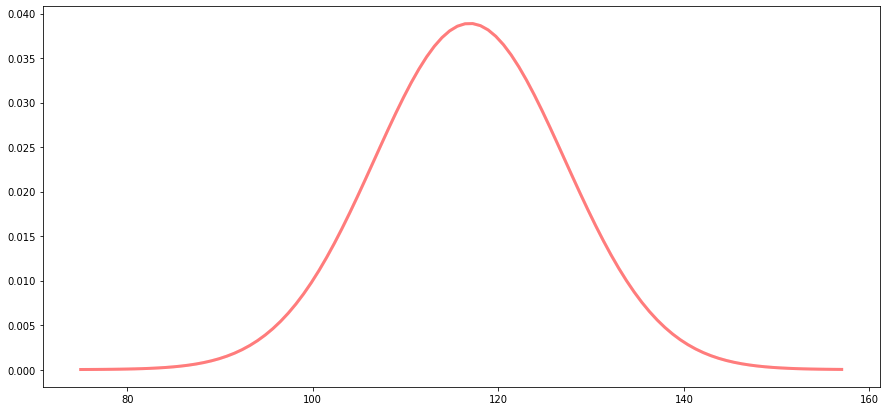

In [35]:
from scipy.stats import norm

def linspace(start, stop, num):      
    step= (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step* i)
    return result

mu = 1169 * 0.1
sigma = sqrt(1169 * 0.1 * (0.9))

left = int(1169* 0.1- 4 * sqrt(1169* 0.1* (0.9)))
right = int(1169* 0.1+ 4 * sqrt(1169* 0.1* (0.9)))    
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
plt.figure(figsize=(15, 7))

x = linspace(left, right, 100)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))

# используем красную линию ширины 3 и прозрачности 0.3
ax = plt.subplot()
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')


ax=plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
#print(ax) 

# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)

#ax.set_xticks(x_ticks, labels = x_ticks, rotation = 90,fontsize = 7)

plt.show()

#### Вывод:
**Для достижения "успеха" акции с 95%-ной вероятностью необходимо раздать 1169 промокодов**

### Push-уведомления 

**Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построили примерный график распределения и оценили вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**

**Построили необходимое распределение**

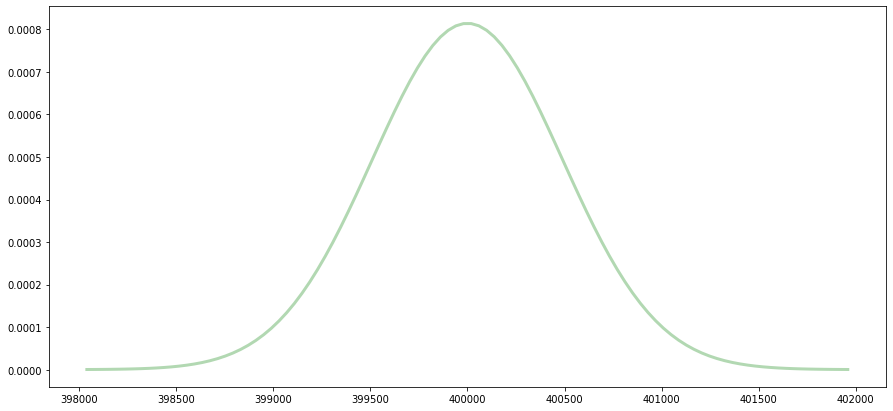

In [36]:
p = 4/10
n = 1000000# задали параметры p и n
mu = n * p# рассчитали параметры 
sigma = sqrt(n * p * (1 - p))# нормального распределения
distr = st.norm(mu, sigma)# задали нормальное распределение
left = int(n* p- 4 * sqrt(n* p* (1 - p)))
right = int(n* p+ 4 * sqrt(n* p* (1 - p)))    
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
plt.figure(figsize=(15, 7))

x = linspace(left, right, 100)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))

# используем красную линию ширины 3 и прозрачности 0.3
ax = plt.subplot()
ax.plot(x, norm.pdf(x, mu, sigma), 'g-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')

plt.show()

**Нашли необходимую вероятность**

In [37]:
print(1 - distr.cdf(399500))

0.8462829170363023


#### Вывод:
**Искомая вероятность составляет примерно 85%. Можно с высокой точностью утверждать, что уведомление откроет более 399,5 тыс. пользователей**

# Общий вывод

**В данной работе исследовались закономерности ключевых факторов для 
двух групп пользователей электросамокатов(пользователи с подпиской и 
без). Исходные данные представляют собой таблицы с данными компании 
GoFact, предоставляющей услуги аренды электросаокатов, содержащие 
информацию о пользователях, поездках и типах подписки**

**Была проведена предобработка данных**

**Был добавлен дополнительный столбец: месяц, в который произошла поездка. Тип данных в столбце с датой поездки, был заменен на целочисленный, для более точного и удобного анализа**

**Был проведен анализ ключевых столбцов.  Получены выводы о пригодности данных для исследования. Также были удалены пропуски и дубликаты. Исходные данные пригодны для дальнейшего исследования**

**Была проведена аггрегация данных и подсчет прибыли. Данные выглядят вполне адекватными**

**Были проверены гипотезы относительно прибыльности обоих типов клиентов(в особенности пользователей с активной подпиской). Были получены результаты:**
- `Нулевую гипотезу (Среднее время поездки для пользователей с подпиской >, чем для 2 группы) не следует отвергать`

- `Гипотезу "пользователи с подпиской в среднем проезжают меньше 3130 метров" не следует отвергать`

- `Гипотезу "пользователи с подпиской  в среднем приносят больше ежемесячной прибыли" следует не следует отвергать`

- `Для достижения "успеха" акции по раздаче бесплатных промокодов с 95%-ной вероятностью необходимо раздать 1169 промокодов`

- `Вероятность "успеха" рекламы посредством рассылки push-уведомлений составляет примерно 85%. Можно с высокой точностью утверждать, что уведомление откроет более 399,5 тыс. пользователей`

**Также были расщитаны ежемесячные прибыли для каждого пользователя из двух групп(с подпской, без подписки) Результат показал, что пользователи без подписки приносят всреднем больше ежемесячной прибыли, чем пользователи с подпиской.(В основном это вызвано тем, что пользователи без подписки должны каждую поезку платить 50 р за старт(обычно за 10 - 15 ежемесячных поездок набирается 500 - 1000 р), тогда как пользователи с подпиской должны лишь единоразово оплачивать лишь стоимость подписки 199 р, а старт у них бесплатный)**

## Рекомендации:

**С одной стороны, пользователи без подписки более выгодны для 
компании с точки зрения прибыли в случае, если они ездят > 5 раз в 
месяц, однако, с другой стороны, ultra-пользовали оплачивают подписку
даже в те месяцы, когда вообще не пользуются электросамокатами. 
Есть смысл немного поднять стоимость подписки**